In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('data.csv', sep = "#")

In [11]:
df.head()

,Position,Track Name,Artist,Streams,Date,Genre
0,1,Starboy,The Weeknd,3135625,2017-01-01,"['canadian pop', 'canadian contemporary r&b', ..."
1,2,Closer,The Chainsmokers,3015525,2017-01-01,"['pop', 'pop dance', 'tropical house', 'edm', ..."
2,3,Let Me Love You,DJ Snake,2545384,2017-01-01,"['pop', 'electronic trap', 'dance pop', 'edm',..."
3,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,2017-01-01,"['pop', 'uk dance', 'dance pop', 'uk funky', '..."
4,5,One Dance,Drake,2259887,2017-01-01,"['toronto rap', 'canadian pop', 'canadian hip ..."


In [12]:
df.sort_values('Streams').head()

,Position,Track Name,Artist,Streams,Date,Genre
199,200,Ni**as In Paris,JAY-Z,325951,2017-01-01,"['rap', 'hip hop', 'east coast hip hop', 'pop ..."
399,200,Take Me To Church,Hozier,330936,2017-01-02,"['irish singer-songwriter', 'pop', 'modern rock']"
198,199,Secrets,The Weeknd,331233,2017-01-01,"['canadian pop', 'canadian contemporary r&b', ..."
197,198,Superstition - Single Version,Stevie Wonder,331376,2017-01-01,"['motown', 'soul', 'quiet storm', 'indie r&b',..."
196,197,Oh Lord,MiC LOWRY,331792,2017-01-01,"['pop r&b', 'trap soul', 'post-teen pop', 'r&b..."


In [13]:
df.sample(frac=0.1).head()

,Position,Track Name,Artist,Streams,Date,Genre
179086,87,MIA (feat. Drake),Bad Bunny,1010494,2019-06-19,"['trap latino', 'reggaeton', 'latin']"
56061,62,Báilame - Remix,Nacho,1042215,2017-10-12,"['pop venezolano', 'pop reggaeton', 'pop perua..."
315193,194,Come & Go (with Marshmello),Juice WRLD,720907,2021-05-05,"['melodic rap', 'chicago rap']"
139528,129,Ya No Tiene Novio,Sebastian Yatra,843103,2018-12-03,"['reggaeton colombiano', 'colombian pop', 'reg..."
88440,41,Sick Boy,The Chainsmokers,1556003,2018-03-23,"['pop', 'pop dance', 'tropical house', 'edm', ..."


In [14]:
df_time = df.groupby('Date').sum()[['Streams']]
df_time.head()

,Streams
Date,
2017-01-01,148613167
2017-01-02,154810836
2017-01-03,166239930
2017-01-04,169252507
2017-01-05,169919094


In [15]:
import seaborn as sns

<AxesSubplot:xlabel='Date', ylabel='Streams'>

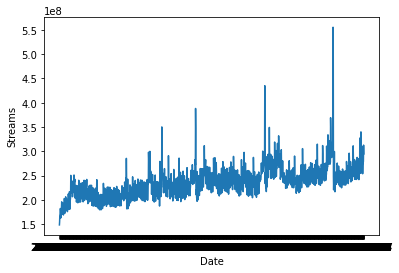

In [16]:
sns.lineplot(x=df_time.index, y=df_time.Streams)

In [37]:
df3 = []
ts = pd.Series(df_time["Streams"].values, index=df_time.index)
mean_smoothed = ts.rolling(window=30).mean()
# mean_smoothed
df2 = pd.DataFrame(mean_smoothed)
df2.columns = ["MA"]
df3 = pd.concat([df_time, df2], axis=1).query("MA == MA")
df3.head()

,Streams,MA
Date,,
2017-01-30,182877456,1.800430e+08
2017-01-31,190191924,1.814290e+08
2017-02-01,193633315,1.827231e+08
2017-02-02,194517087,1.836656e+08
2017-02-03,206406926,1.849041e+08


<AxesSubplot:xlabel='Date', ylabel='MA'>

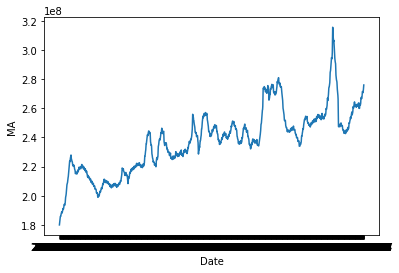

In [18]:
#df3_s = df3.sample(frac = 0.1)
sns.lineplot(x=df3.index, y=df3.MA)

In [51]:
#df3['date'] = df3.index
df3['date'] = pd.to_datetime(df3.index, format='%Y-%m-%d')
df3['ts'] 
df3.head()

,Streams,MA,date
Date,,,
2017-01-30,182877456,1.800430e+08,2017-01-30
2017-01-31,190191924,1.814290e+08,2017-01-31
2017-02-01,193633315,1.827231e+08,2017-02-01
2017-02-02,194517087,1.836656e+08,2017-02-02
2017-02-03,206406926,1.849041e+08,2017-02-03


In [70]:
from datetime import datetime
#df.index = pd.DatetimeIndex(df.index).to_period('M')
tseries = pd.Series(df3.Streams, index=df3.date)
tseries.index = pd.DatetimeIndex(tseries.index).to_period('D')
tseries

date
2017-01-30    182877456
2017-01-31    190191924
2017-02-01    193633315
2017-02-02    194517087
2017-02-03    206406926
                ...    
2021-07-13    275809233
2021-07-14    276827299
2021-07-15    279502493
2021-07-16    312799651
2021-07-17    294531580
Freq: D, Name: Streams, Length: 1577, dtype: int64

In [71]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [81]:
selection_res = ar_select_order(tseries, 100, old_names=True)
pandas_ar_res = selection_res.model.fit()
pred = pandas_ar_res.predict()
pred[20:]

date
2017-02-19    1.892271e+08
2017-02-20    1.903357e+08
2017-02-21    1.996661e+08
2017-02-22    1.968770e+08
2017-02-24    2.031459e+08
                  ...     
2021-07-13    2.786795e+08
2021-07-14    2.675430e+08
2021-07-15    2.745495e+08
2021-07-16    3.104937e+08
2021-07-17    2.877291e+08
Freq: D, Length: 1557, dtype: float64

In [86]:
#fig = pandas_ar_res.plot_predict(start='2017', end='2021')

<AxesSubplot:xlabel='date'>

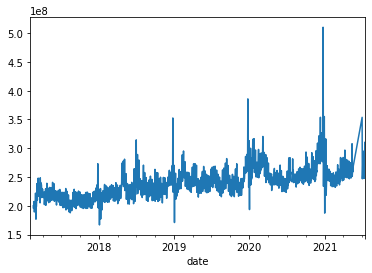

In [85]:
pred.plot()

In [90]:
df3['ts'] = df3.date.values.astype(np.int64)
df3

,Streams,MA,date,ts
Date,,,,
2017-01-30,182877456,1.800430e+08,2017-01-30,1485734400000000000
2017-01-31,190191924,1.814290e+08,2017-01-31,1485820800000000000
2017-02-01,193633315,1.827231e+08,2017-02-01,1485907200000000000
2017-02-02,194517087,1.836656e+08,2017-02-02,1485993600000000000
2017-02-03,206406926,1.849041e+08,2017-02-03,1486080000000000000
...,...,...,...,...
2021-07-13,275809233,2.706516e+08,2021-07-13,1626134400000000000
2021-07-14,276827299,2.717581e+08,2021-07-14,1626220800000000000
2021-07-15,279502493,2.726997e+08,2021-07-15,1626307200000000000


In [93]:
import statsmodels.api as sm

X = df3['ts']
y = df3['Streams']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Streams   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                nan
Time:                        19:38:34   Log-Likelihood:                -29165.
No. Observations:                1577   AIC:                         5.833e+04
Df Residuals:                    1576   BIC:                         5.834e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.889e-29   2.71e-31    364.602      0.000    9.84e-29    9.94e-29
ts          1.538e-10   4.22e-13    364.602      0.000    1.53e-10    1.55e-10
==============================================================================
Omnibus:                     1067.812   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31964.933
Skew:                           2.722   Prob(JB):                         0.00
Kurtosis:                      24.373   Cond. No.                     6.11e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+19. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

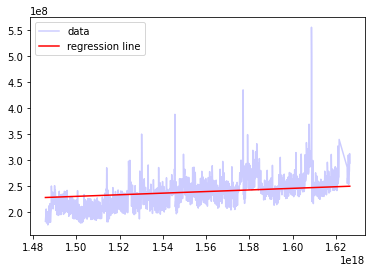

In [112]:
import matplotlib.pyplot as plt

plt.plot(df3['ts'], df3['Streams'], 'b', alpha = 0.2, label='data')
plt.plot(df3['ts'], model.params[0] + model.params[1]*df3['ts'], 'r', label='regression line')
plt.legend()
plt.show()

In [119]:
df_artist = df.groupby('Artist').sum()[['Streams']]
df_artist = df_artist.sort_values('Streams', ascending=False)
df_artist.head(15)

,Streams
Artist,
Post Malone,13513461417
Ed Sheeran,11450684279
Drake,9158708130
Billie Eilish,8570405790
Ariana Grande,8209907401
XXXTENTACION,6759777399
Bad Bunny,6401130360
The Weeknd,6078051362
Dua Lipa,5644638436
